# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 16th May, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/14z3q91F8xzPb8Hm-KxNGn-nkKacqB17v?usp=drive_link
<h3><span style="color:red"> Deadline: 31st May, 2025 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [30]:
class Book:

    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self.checked_out = False

    # Check if book is available
    def is_available(self):
        return(self.checked_out == False)

    # defining a method to mark the book as checked out.
    def check_out(self):
        if self.is_available():
            self.checked_out = True
            print(f'"{self.title}" by {self.author} (ISBN: {self.isbn}) has been checked out.')
        else:
            print(f'"{self.title}" by {self.author} (ISBN: {self.isbn}) is already checked out.')

    # defining a method to mark the book as checked in.
    def check_in(self):
        if not self.is_available():
            self.checked_out = False
            print(f'"{self.title}" by {self.author} (ISBN: {self.isbn}) has been checked in.')

        else:
            print(f'"{self.title}" by {self.author} (ISBN: {self.isbn}) was not checked out.')

class Patron:

    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = []

    def borrow_book(self, book):
        if book.is_available():
            book.check_out()
            self.borrowed_books.append(book)
            print(f'{self.name} (ID: {self.patron_id}) borrowed "{book.title}" by {book.author}.')
        else:
            print(f'Sorry, "{book.title}" by {book.author} is already checked out.')


class Library:
        def __init__(self):
          self.books = []
          self.patrons = []

        def add_book(self, book):
          self.books.append(book)
          print(f'Added "{book.title}" by {book.author} (ISBN: {book.isbn}) to the library.')

        def add_patron(self, patron):
          self.patrons.append(patron)
          print(f'{patron.name} (ID: {patron.patron_id}) is now a patron of the library.')

        def lend_book(self, book, patron):
            if book.is_available():
                if patron in self.patrons:
                    patron.borrow_book(book)
                else:
                    print(f'Error: {patron.name} is not a registered patron.')
            else:
                    print(f'Sorry, "{book.title}" by {book.author} is not available.')

        def return_book(self, book, patron):
            if patron in self.patrons and book in patron.borrowed_books:
                book.check_in()
                patron.borrowed_books.remove(book)
                print(f'{patron.name} returned "{book.title}" by {book.author} to the library.')
                

# Create Library Instance
library = Library()

# Create Books
book1 = Book("The Catcher in the Rye", "J.D. Salinger", "9780316769488")
book2 = Book("1984", "George Orwell", "9780451524935")

# Add Books to Library
library.add_book(book1)
library.add_book(book2)

# Create Patron
patron1 = Patron("Anuj", 101)
library.add_patron(patron1)

# Borrow a Book
library.lend_book(book1, patron1)

# Return the Book
library.return_book(book1, patron1)

Added "The Catcher in the Rye" by J.D. Salinger (ISBN: 9780316769488) to the library.
Added "1984" by George Orwell (ISBN: 9780451524935) to the library.
Anuj (ID: 101) is now a patron of the library.
"The Catcher in the Rye" by J.D. Salinger (ISBN: 9780316769488) has been checked out.
Anuj (ID: 101) borrowed "The Catcher in the Rye" by J.D. Salinger.
"The Catcher in the Rye" by J.D. Salinger (ISBN: 9780316769488) has been checked in.
Anuj returned "The Catcher in the Rye" by J.D. Salinger to the library.


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [22]:
import math

class Shape:
    def area(self):
        raise NotImplementedError("Subclasses must implement the area method")

    def perimeter(self):
        raise NotImplementedError("Subclasses must implement the perimeter method")

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return math.pi * self.radius ** 2

    def perimeter(self):
        return 2 * math.pi * self.radius

rect = Rectangle(5, 10)
circle = Circle(7)

print(f"Rectangle Area: {rect.area()}, Perimeter: {rect.perimeter()}")
print(f"Circle Area: {circle.area():.2f}, Perimeter: {circle.perimeter():.2f}")


Rectangle Area: 50, Perimeter: 30
Circle Area: 153.94, Perimeter: 43.98


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [29]:
#base class
class Employee:
    def __init__(self, name, employee_id):
        self.name = name
        self.employee_id = employee_id
    
    def calculate_paycheck(self):
        raise NotImplementedError("Subclasses must implement it's own calculate_paycheck method")

#Subclass 1
class SalariedEmployee(Employee):
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self):
        return self.monthly_salary

#Subclass 2
class HourlyEmployee(Employee):
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self):
        return (self.hours_worked * self.hourly_rate)
    

# Creating employee instances
salaried_emp = SalariedEmployee("Anuj", 101, 100000)
hourly_emp = HourlyEmployee("Aman", 102, 100, 90)  # Rs 100/hr, worked 90 hours in a week

# Calling calculate_paycheck()
print(f"{salaried_emp.name} (ID: {salaried_emp.employee_id}) earns Rs { salaried_emp.calculate_paycheck()} per month.")
print(f"{hourly_emp.name} (ID: {hourly_emp.employee_id}) earns Rs {hourly_emp.calculate_paycheck()} per week.")


Anuj (ID: 101) earns Rs 100000 per month.
Aman (ID: 102) earns Rs 9000 per week.


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class polynomial:
    def __init__(self, degree, coefficients):
        self.degree = degree
        self.coefficients = coefficients

        if ((self.degree <= 0) or (len(self.coefficients) != (self.degree + 1))):
            raise ValueError(f"Number of coefficients = {len(self.coefficients)} should be = {self.degree} + 1")
        else:
            self.num_coefficients = len(self.coefficients)
            terms = []
            for i, coef in enumerate(self.coefficients):
                power = self.degree - i
                if coef != 0:
                    term = f"{abs(coef)}x^{power}" if power > 1 else f"{abs(coef)}x" if power == 1 else f"{abs(coef)}"
                    terms.append(f"- {term}" if coef < 0 else f"+ {term}")
            
            # Removes leading "+"
            polynomial_str = " ".join(terms).lstrip("+ ")
            print(f"Polynomial: {polynomial_str}")

        
    # Method: 1, Evaluate the polynomial
    def evaluate(self, x):
            #print(type(np.polyval(self.coefficients, x)))
            #print(f"value of plynomial is {np.polyval(self.coefficients, x)} at x: {x}")
            return np.polyval(self.coefficients, x)


    # Method: 2, Plot the ploynomial value for a given range
    def plot(self, x_range):
 
        x_values = np.linspace(x_range[0], x_range[1], 50)
        y_values = self.evaluate(x_values)

        # Plot the polynomial
        plt.plot(x_values, y_values, label='Polynomial Curve', color='b')
        plt.axhline(0, color='black', linewidth=1)
        plt.axvline(0, color='black', linewidth=1)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Polynomial Plot")
        plt.show()

    # Method: 3, Derivative of polynomial.
    def derivative(self, x):
        dx = 1e-6
        x = np.asarray(x)
        #print(f"derivative is {((self.evaluate(x + dx) - self.evaluate(x - dx)) / (2 * dx))} at {x}")
        return ((self.evaluate(x + dx) - self.evaluate(x - dx)) / (2 * dx))


    # Method: 4, Plot the derivative for a given range of x.
    def plot_derivative(self, x_range): 
 
        x_values = np.linspace(x_range[0], x_range[1], 50)
        y_values = self.derivative(x_values)

        # Plot the derivative of a polynomial
        plt.plot(x_values, y_values, label='Derivative of Polynomial Curve', color='b')
        plt.axhline(0, color='black', linewidth=1)
        plt.axvline(0, color='black', linewidth=1)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Derivative of Polynomial Plot")
        plt.show() 

Polynomial: 2x^3 - 3x^2 + 4x - 5


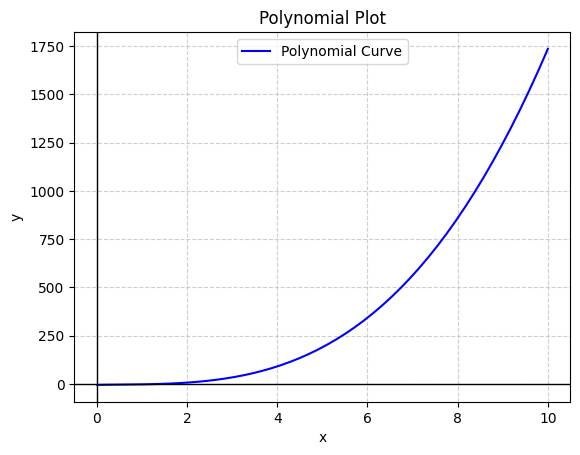

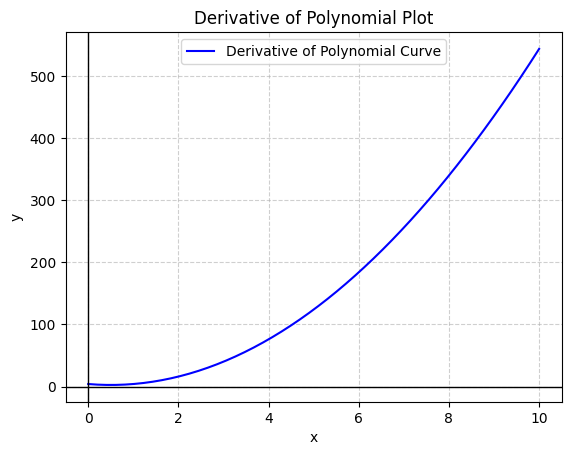

In [66]:
p = polynomial(4, [0, 2, -3, 4, -5])
p.evaluate(10)
p.plot([0,10])
p.derivative(10)
p.plot_derivative([0,10])

## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [3]:
# Create a Product class
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

# Create a Shopping cart class
class ShoppingCart:
    def __init__(self):
        self.cart_objects = []
        #print(type(self.cart_objects))

    def add_item(self, name, price):
        product = Product(name, price)
        #print(type(product))
        self.cart_objects.append(product)
        print(f'Added: {product.name} - Rs {product.price:}')

    def remove_item(self, name):
        for cart_object in self.cart_objects:
            if cart_object.name == name:  
                self.cart_objects.remove(cart_object)
                print(f'Removed: {cart_object.name} - Rs {cart_object.price:}')
                return
        print(f'Error: Product "{name}" not found in the cart.')

    def calculate_total(self):
        total_value = sum(cart_object.price for cart_object in self.cart_objects)
        print(f'Total price of items in the cart: Rs {total_value:}')
        return total_value

cart = ShoppingCart()

# Adding products
cart.add_item("Phone", 100000)
cart.add_item("Speakers", 3000)
cart.add_item("laptop", 200000.790)

# Removing a product
cart.remove_item("Phone")

# Calculating total
cart.calculate_total()


Added: Phone - Rs 100000
Added: Speakers - Rs 3000
Added: laptop - Rs 200000.79
Removed: Phone - Rs 100000
Total price of items in the cart: Rs 203000.79


203000.79